<a href="https://colab.research.google.com/github/bmox/mediapipe_body_background_blur/blob/main/mediapipe_pose.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
!pip install mediapipe==0.8.7.3

In [ ]:
!wget https://img.republicworld.com/republic-prod/stories/promolarge/xhdpi/ey9pybbjgfmt7rjz_1613565240.jpeg

In [19]:
import os
os.rename("ey9pybbjgfmt7rjz_1613565240.jpeg","/content/image.jpeg")

In [20]:
import cv2
import mediapipe as mp
import numpy as np
from google.colab.patches import cv2_imshow
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_pose = mp.solutions.pose
cap = cv2.VideoCapture(0)
pose=mp_pose.Pose(
    static_image_mode=True,
    model_complexity=2,
    enable_segmentation=True,
    min_detection_confidence=0.7,
    min_tracking_confidence=0.7)
def find_human(image,draw=True):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False
    results = pose.process(image)
    body_parts=[]
    if results.pose_landmarks:
        for id, lm in enumerate(results.pose_landmarks.landmark):
                    h, w, c = image.shape
                    # print(id, lm)
                    cx, cy = int(lm.x * w), int(lm.y * h)
                    body_parts.append([id,cx,cy]) 
    else:
        body_parts.append("None")
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    if draw:
        mp_drawing.draw_landmarks(
            image,
            results.pose_landmarks,
            mp_pose.POSE_CONNECTIONS,
            landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style())
    return image, body_parts      




In [21]:
image = cv2.imread("/content/image.jpeg")
image,body_parts =find_human(image,draw=True)

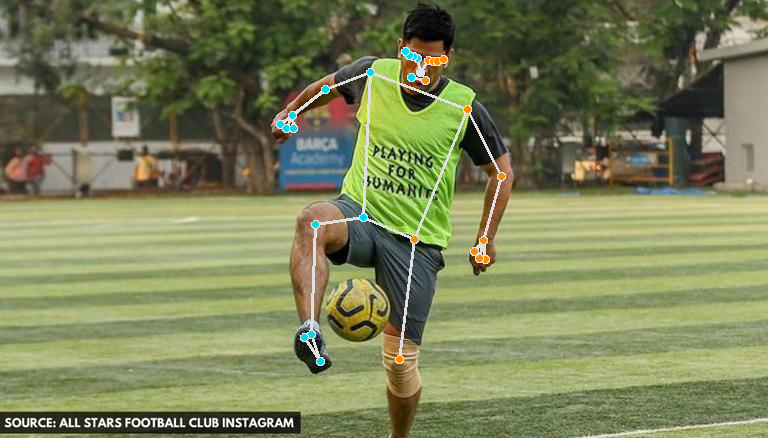

In [22]:
cv2_imshow(image)
